In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [6]:
obj=[]
flo=[]
for q in df.dtypes.index:
    if df.dtypes[q]=='object':
        obj.append(q)
    else:
        flo.append(q)
print(obj,'\n')
print(flo)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [7]:
df.isna().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64

In [8]:
for i in obj:
    df[i]=df[i].fillna(df[i].mode()[0])

for i in flo:
    df[i]=df[i].fillna(df[i].mean())

In [9]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


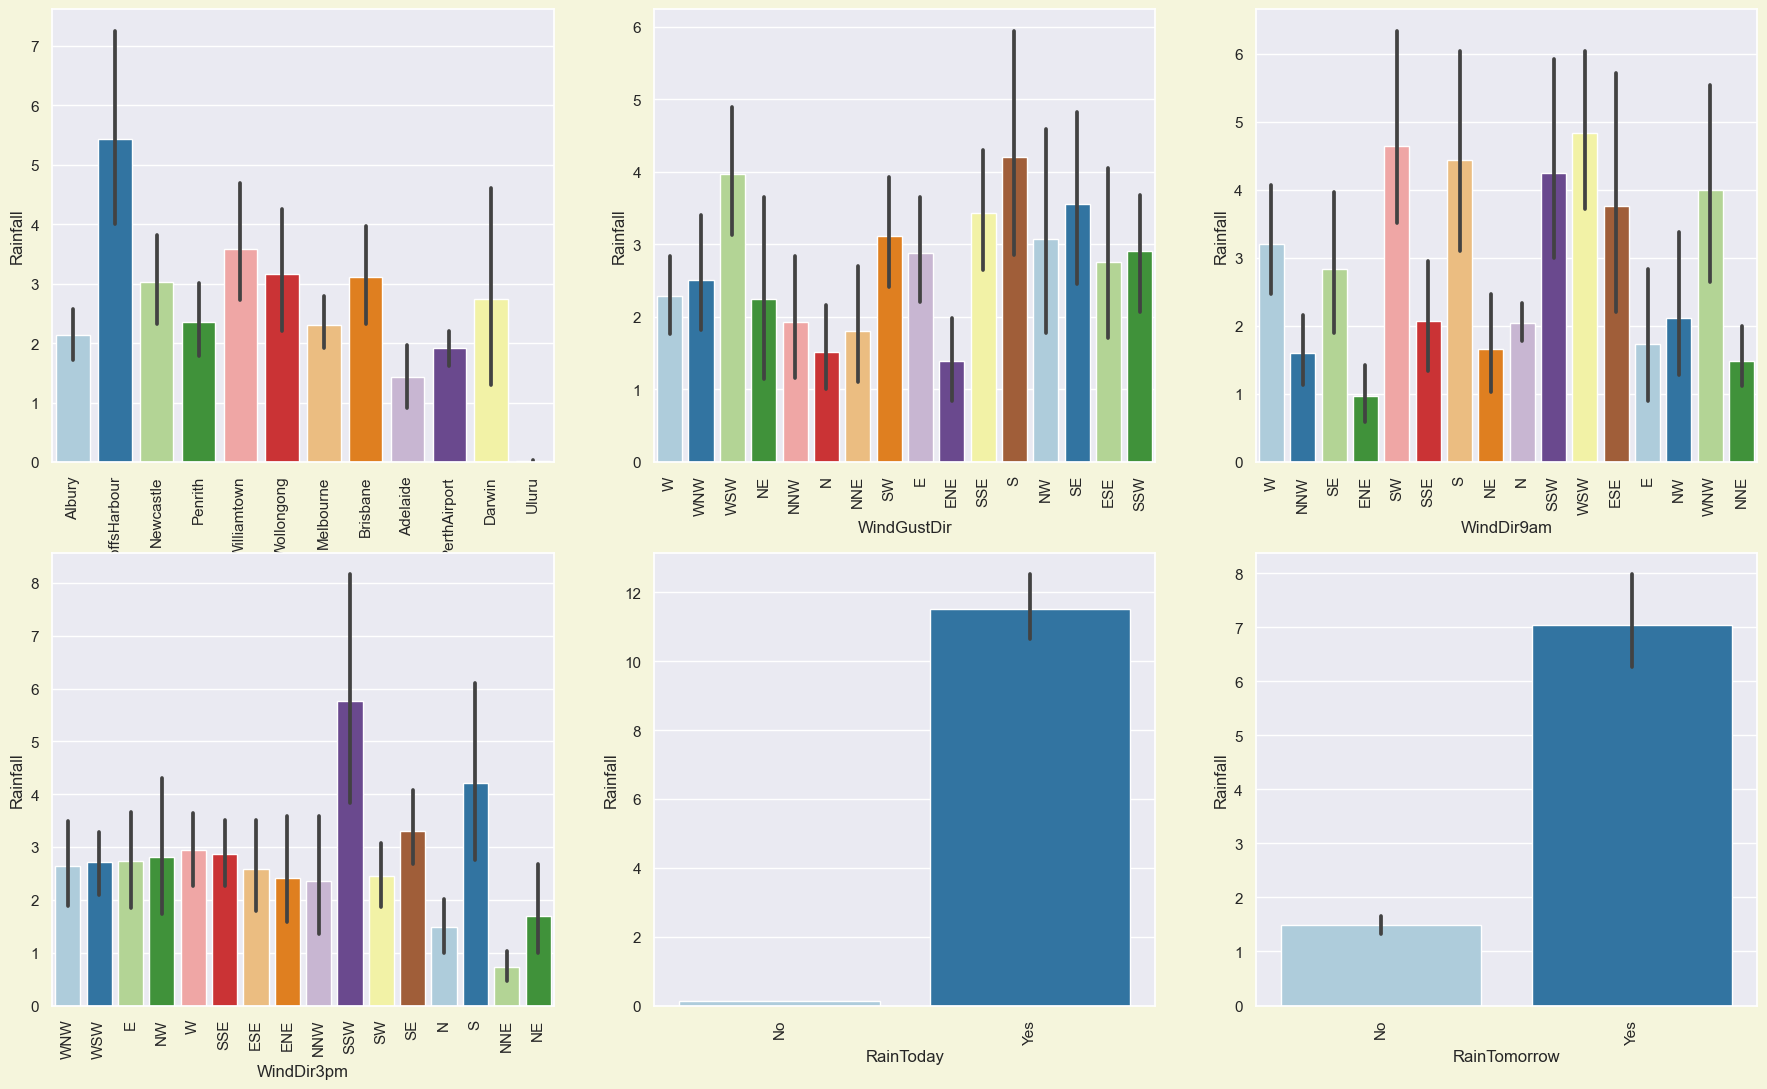

In [11]:
sns.set_style('darkgrid')
sns.set(font_scale=1)
plt.figure(facecolor='beige',figsize=(22,20))
p=1
for i in obj:
    if p<=9:
        ax=plt.subplot(3,3,p)
        sns.barplot(x=df[i],palette='Paired',y='Rainfall',data=df)
        plt.xticks(rotation=90)
    p+=1

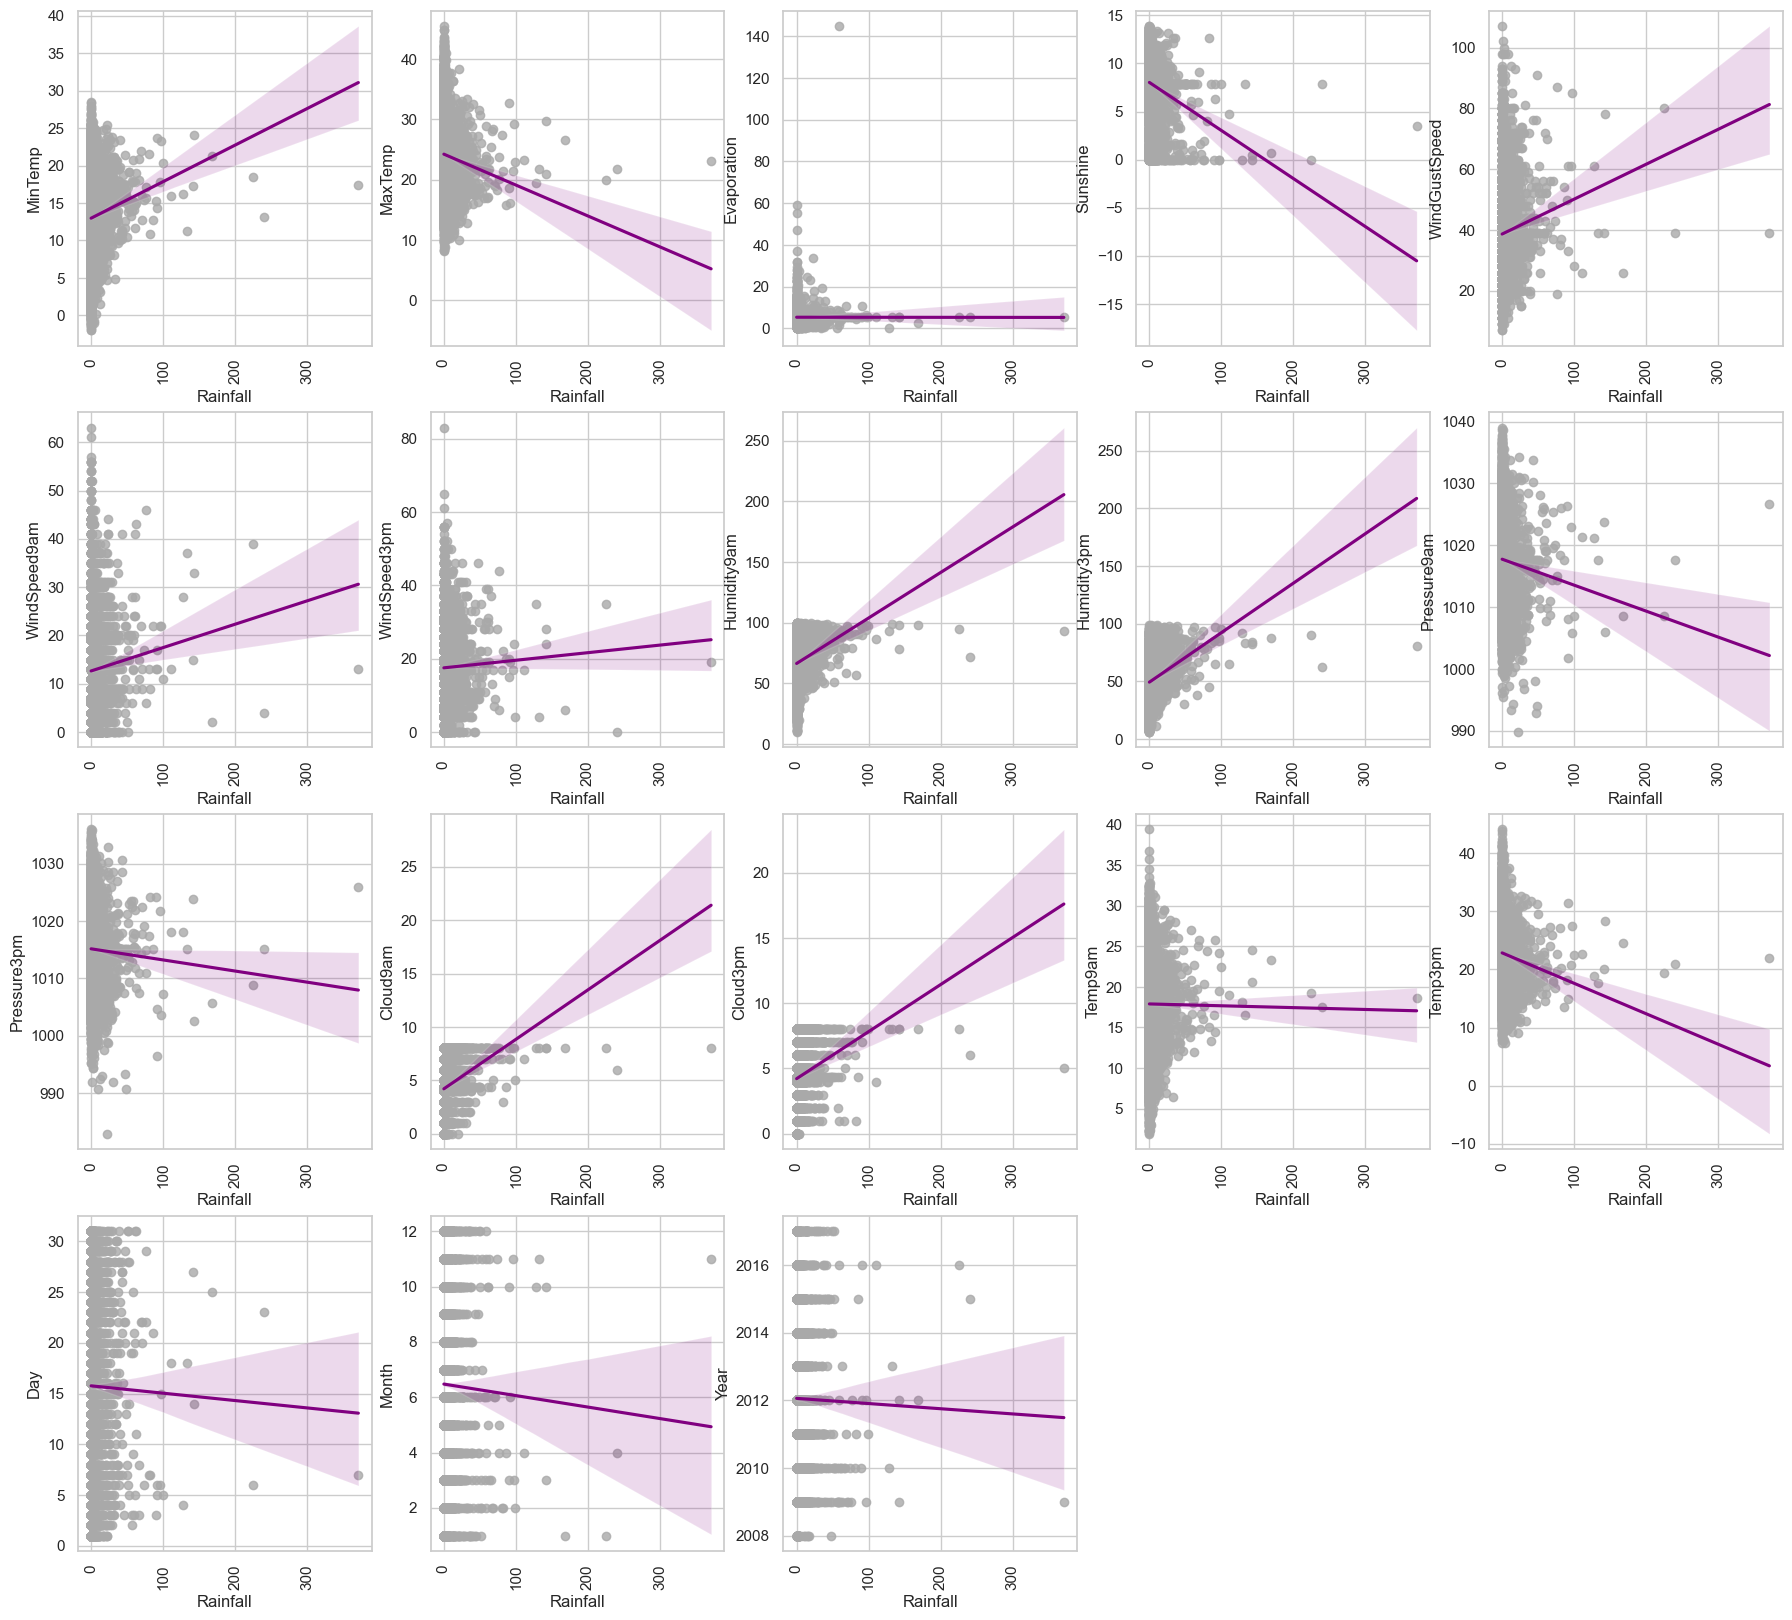

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(22,20))
p=1
for i in flo:
    if p<=19:
        if i=='Rainfall':
            continue
        ax=plt.subplot(4,5,p)
        sns.regplot(y=df[i],x='Rainfall',color='darkgrey',data=df,line_kws=dict(color='purple'))
        plt.xticks(rotation=90)
    p+=1

In [13]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()
oe=OrdinalEncoder()

In [14]:
#encoding target column
df['RainTomorrow']=le.fit_transform(df['RainTomorrow']) 

#encoding independent variables
for i in obj: 
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

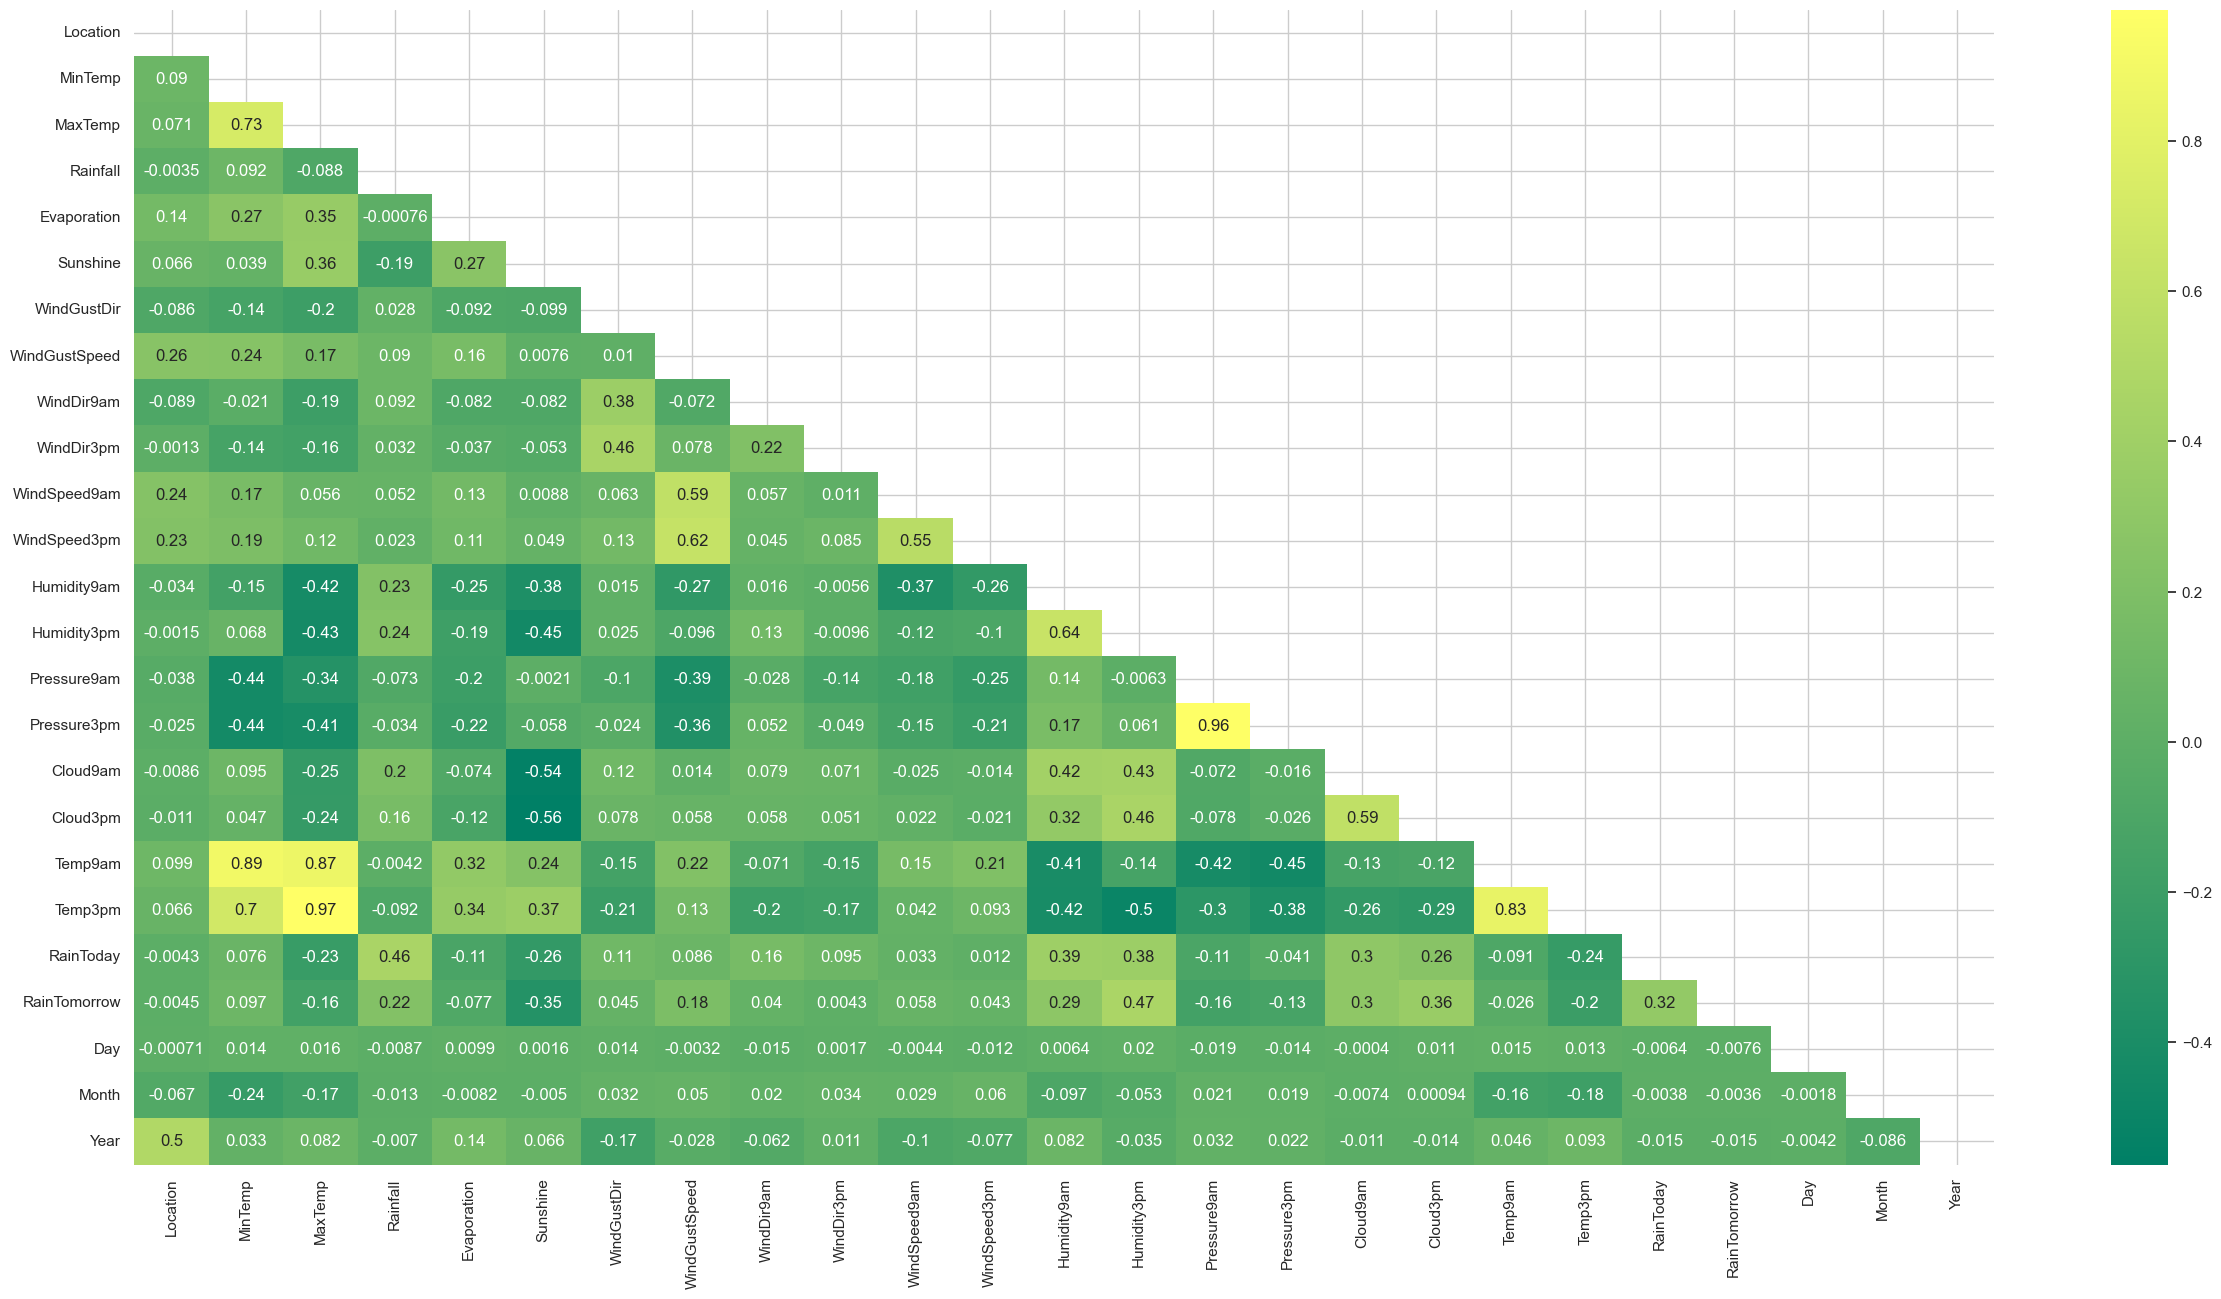

In [15]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()),cmap='summer')
plt.show()

In [16]:
df.drop(['Location','Day','Month','Year'],axis=1,inplace=True)

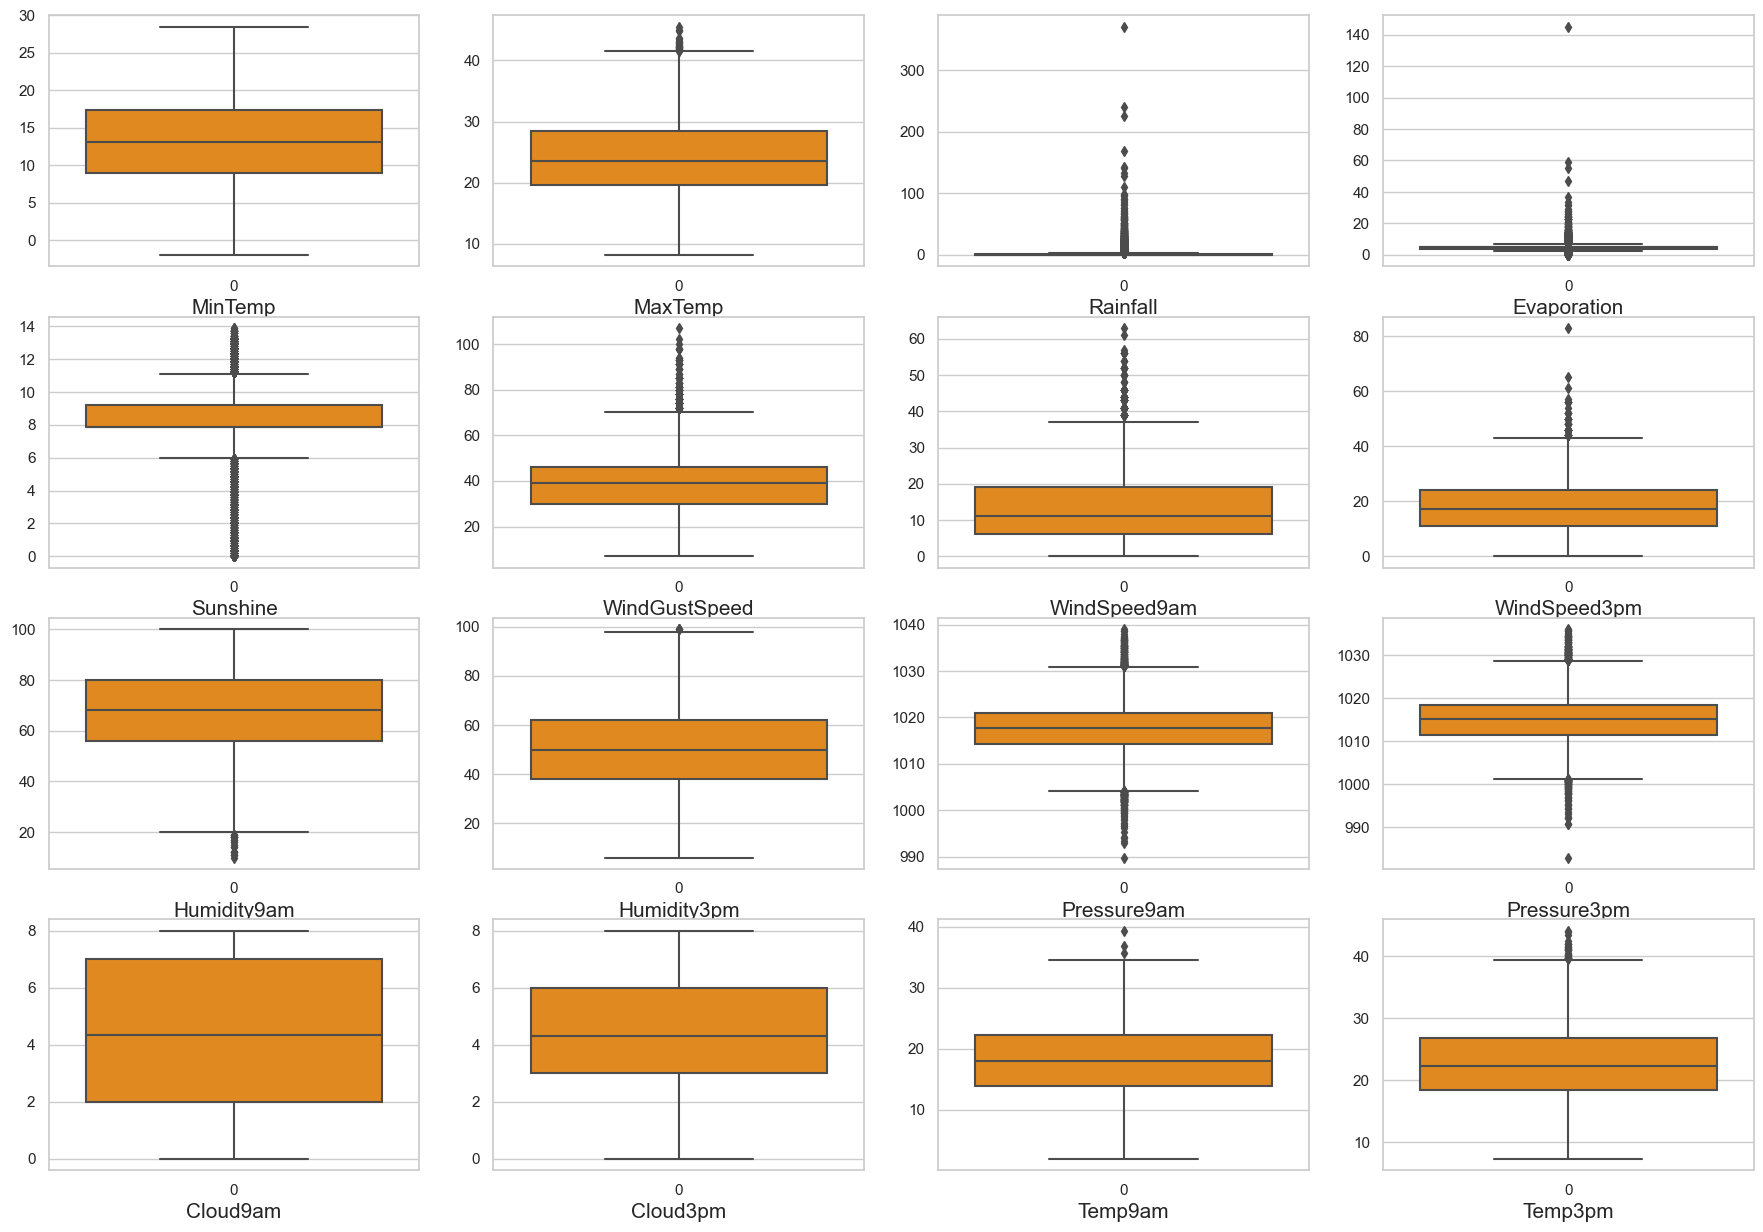

In [17]:
plt.figure(figsize=(22,15))
p=1
for i in flo:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i],color='darkorange')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df1=df[(z<3).all(axis=1)]

5.2% of data loss is acceptable, so we will continue with this data.

In [19]:
(6762-6409)/6762*100

5.220349009168885

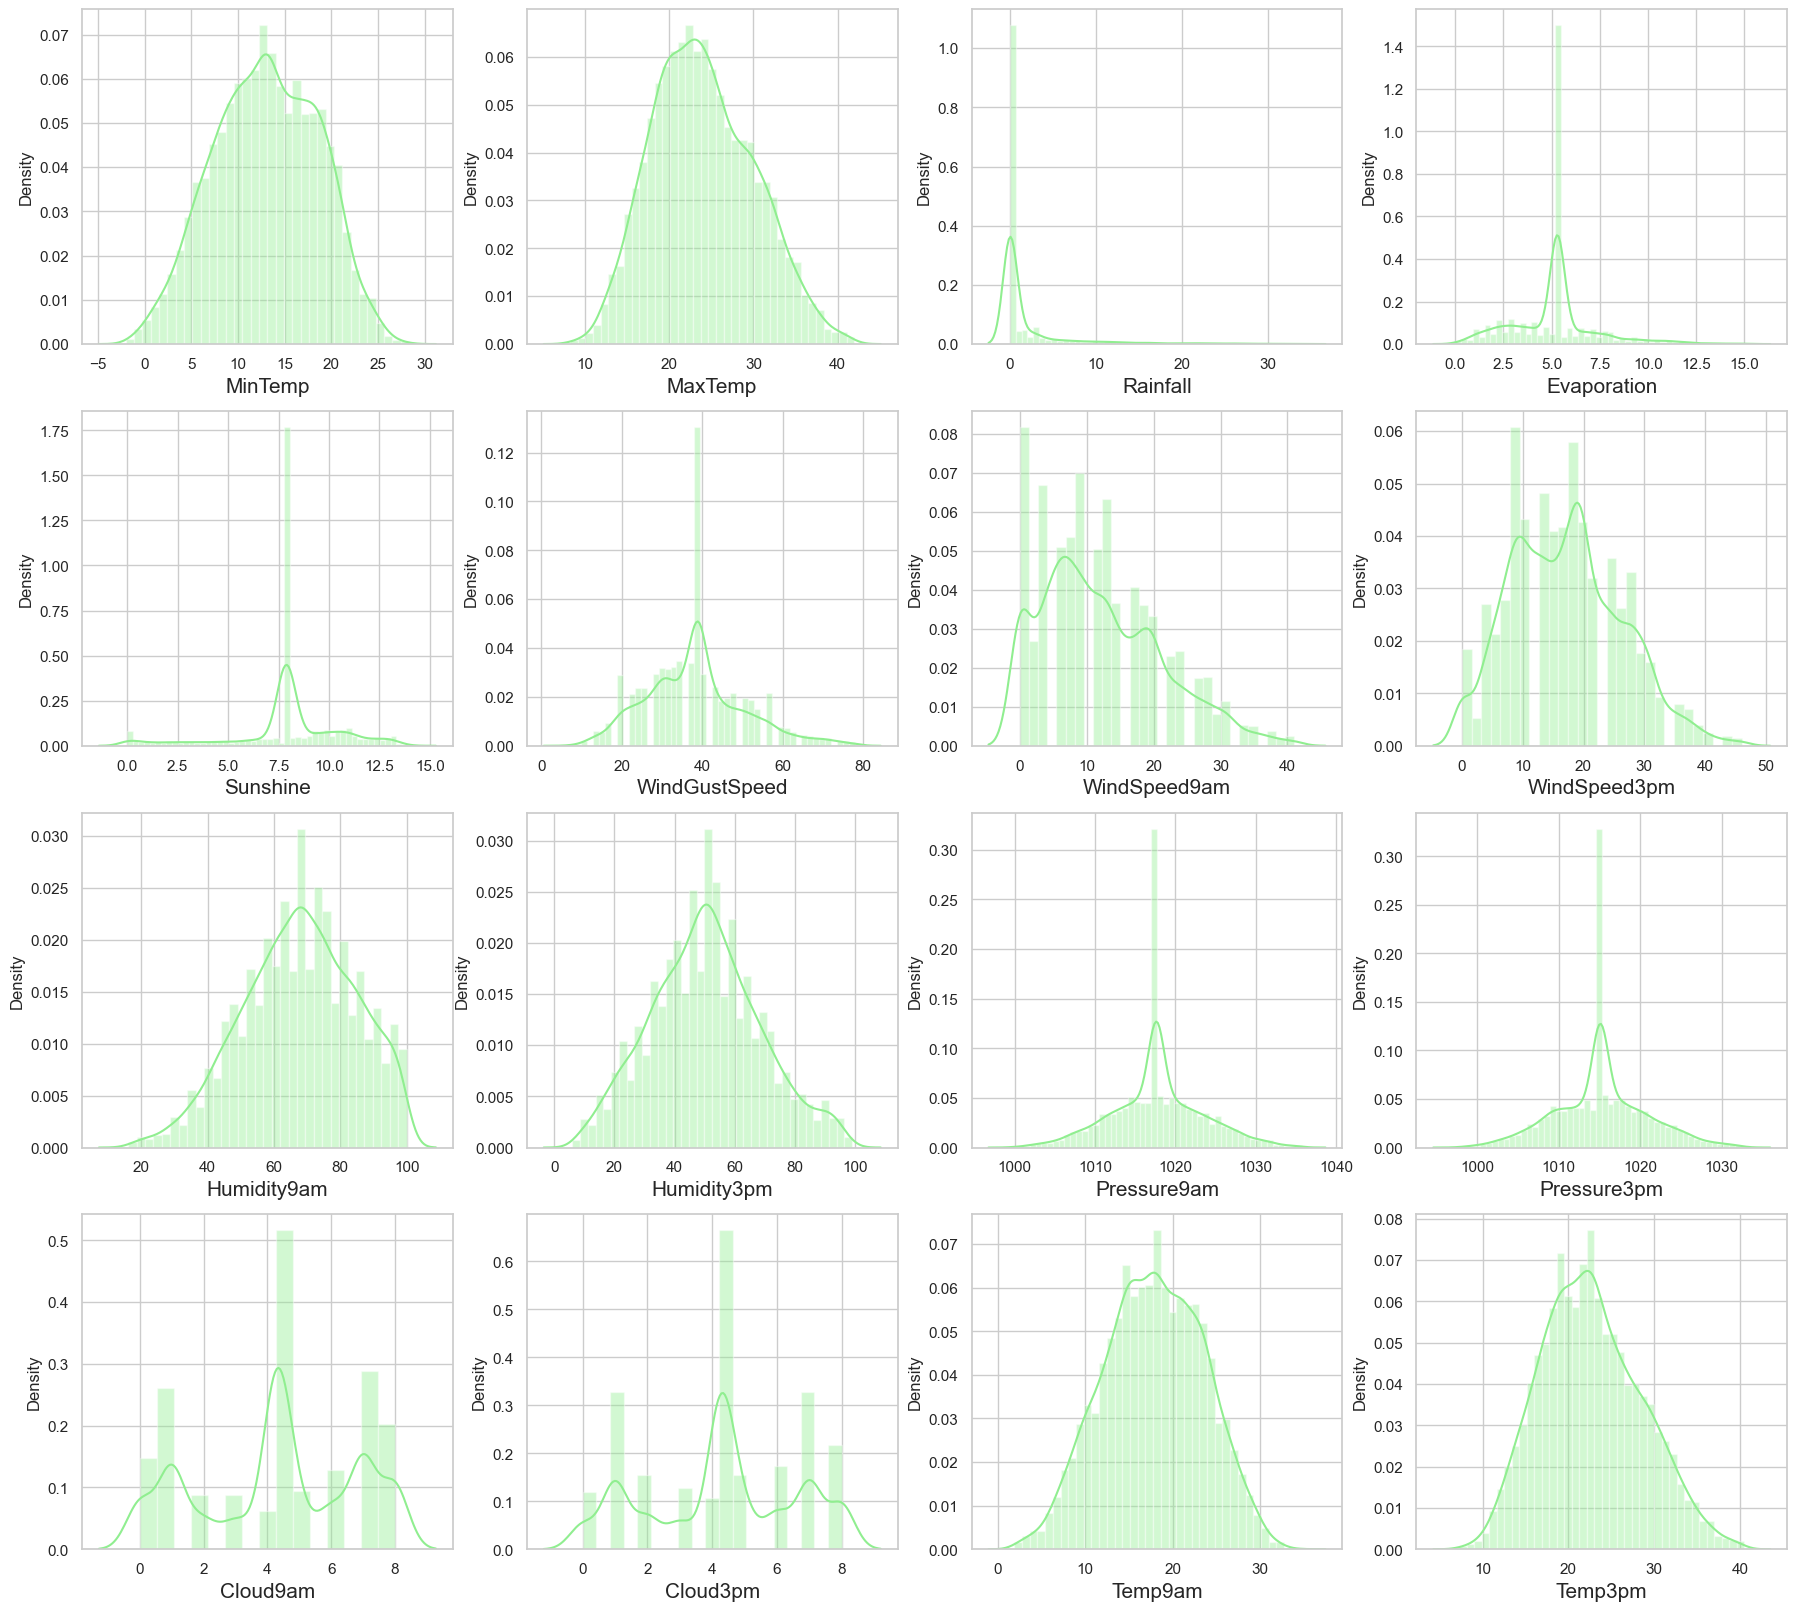

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

In [20]:
plt.figure(figsize=(22,20))
p=1
for i in flo:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df1[i],  color="lightgreen", kde= True)
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()
df1.skew()


In [21]:
df2=df1.copy() 
df2['Rainfall']=np.log1p(df2['Rainfall'])

### Standard Scaling


In [22]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=df2.drop(['RainTomorrow'],axis=1)
y=df2['RainTomorrow']

In [23]:
x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.069172,-0.190821,-0.025691,0.088552,-0.017794,1.222524,0.483303,1.317076,1.373685,0.867217,0.756780,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675
1,-1.013829,0.174339,-0.564612,0.088552,-0.017794,1.413467,0.483303,-0.222676,1.596977,-0.908710,0.536178,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675
2,-0.021078,0.273928,-0.564612,0.088552,-0.017794,1.604410,0.646634,1.317076,1.596977,0.756221,0.977382,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675
3,-0.688929,0.655685,-0.564612,0.088552,-0.017794,-0.495963,-1.149999,0.437218,-1.752399,-0.131742,-0.897735,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675
4,0.809223,1.369406,0.230173,0.088552,-0.017794,1.222524,0.238308,-1.322499,-0.189357,-0.575724,0.315576,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675


### Checking for VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,MinTemp,8.941499
1,MaxTemp,26.286043
2,Rainfall,4.692753
3,Evaporation,1.606410
4,Sunshine,1.998667
5,WindGustDir,1.532163
6,WindGustSpeed,2.207334
7,WindDir9am,1.324110
8,WindDir3pm,1.404301
9,WindSpeed9am,1.969396


After many hit and trial methods we came to know that we have to drop three columns so that every VIF value comes under the acceptance range. Those three columns are Pressure9am,Temp3pm and Temp9am.

In [25]:
x.drop(['Pressure9am','Temp9am','Temp3pm'],axis=1,inplace=True)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,MinTemp,4.658515
1,MaxTemp,5.620928
2,Rainfall,4.672109
3,Evaporation,1.580147
4,Sunshine,1.971847
5,WindGustDir,1.513974
6,WindGustSpeed,2.155265
7,WindDir9am,1.300021
8,WindDir3pm,1.331060
9,WindSpeed9am,1.936683


In [27]:
y.value_counts()

RainTomorrow
0.0    4979
1.0    1430
Name: count, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

y.value_counts()

RainTomorrow
0.0    4979
1.0    4979
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [31]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9120481927710843 on Random State: 3


In [32]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=26)


In [33]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*11)

 For GaussianNB()  Accuracy score is:  0.748995983935743

 Confusion matrix: 
 [[950 258]
 [367 915]]

 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      1208
         1.0       0.78      0.71      0.75      1282

    accuracy                           0.75      2490
   macro avg       0.75      0.75      0.75      2490
weighted avg       0.75      0.75      0.75      2490

Cross Validation Score= 0.7285651395133522 

***********
 For LogisticRegression()  Accuracy score is:  0.772289156626506

 Confusion matrix: 
 [[961 247]
 [320 962]]

 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.75      0.80      0.77      1208
         1.0       0.80      0.75      0.77      1282

    accuracy                           0.77      2490
   macro avg       0.77      0.77      0.77      2490
weighted avg       0.77      0.77      0.77      2490

Cross Validation Score=

In [34]:
from sklearn.model_selection import GridSearchCV
param = {'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}
gcs=GridSearchCV(RandomForestClassifier(),param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt'}

In [35]:
fmodel=RandomForestClassifier(max_features='log2',criterion='entropy',max_depth=20)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.48192771084337


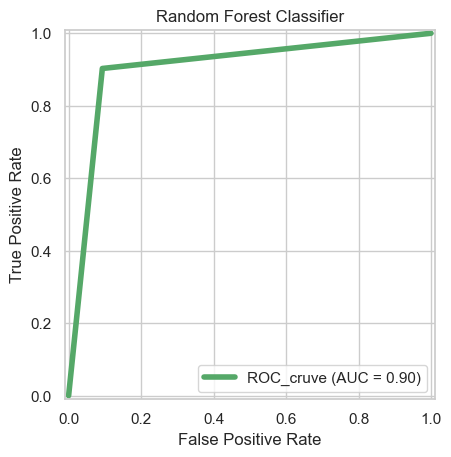

In [36]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=4,color='g')
plt.title('Random Forest Classifier')
plt.show()

In [37]:
import joblib
joblib.dump(fmodel,'RainfallForecast.obj')

['RainfallForecast.obj']